In [9]:
from datalake_indexes_demo import DatalakeIndexesDemo
import pandas as pd
from IPython.display import display, HTML
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 600

demo = DatalakeIndexesDemo("gittables")

___

<h1 align="center" style=font-size:52px>Demonstration of MATE and COCOA </h1>
<h1 align="center" style=font-size:22px></h1>

___

<p align="center">
  <img src="datalake_indexes_qr.png" width=40px/>
</p>

___

___

# 1) Input Preparation

___

## Reading the input dataset

___

In [10]:
demo.read_input("../datasets/movie.csv")

Shape: (5000, 3)


,Movie Title,Director Name,IMDB Score
0,Unleashed,Louis Leterrier,7.0
1,Vaalu,Vijay Chandar,5.1
2,The Da Vinci Code,Ron Howard,6.6
3,Midnight in Paris,Woody Allen,7.7
4,Why Did I Get Married Too?,Tyler Perry,4.4


___

## Selecting the query columns for the joinability discovery

___

In [11]:
demo.set_query_columns(["Director Name", "Movie Title"])

,Movie Title,Director Name,IMDB Score
0,Unleashed,Louis Leterrier,7.0
1,Vaalu,Vijay Chandar,5.1
2,The Da Vinci Code,Ron Howard,6.6
3,Midnight in Paris,Woody Allen,7.7
4,Why Did I Get Married Too?,Tyler Perry,4.4


___

## Select the target column for the downstream ML model

___

In [12]:
demo.set_target_column("IMDB Score")

,Movie Title,Director Name,IMDB Score
0,Unleashed,Louis Leterrier,7.0
1,Vaalu,Vijay Chandar,5.1
2,The Da Vinci Code,Ron Howard,6.6
3,Midnight in Paris,Woody Allen,7.7
4,Why Did I Get Married Too?,Tyler Perry,4.4


___

# 2) Joinability Discovery

___

## Finding the top-20 joinable tables using the Super Key Index and MATE

___

In [13]:
demo.joinability_discovery(k=20, k_c=5000, verbose=True)

Preparing input dataset...
Done.
Fetching joinable tables based on first query column...
Done.
Running hash-based row filtering...


  1%|█▌                                                                                                                                     | 60/5000 [00:32<45:15,  1.82it/s]


Done.
Generating join maps...
Done.
--------------------------------------------
Runtime:
--------------------------------------------
Fetching candidate tables: 0.07s
MATE filtering:            32.69s
Fetching row values:       31.43s

--------------------------------------------
Statistics:
--------------------------------------------
Hash-based filtered rows:  114062
Hash-based approved rows:  25814
Matching rows:             24889
FP rows:                   925
Precision:                 0.964


___

## Inspecting the joinability scores for the retrieved joinable tables

___

[2914, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 969, 352, 352, 352]


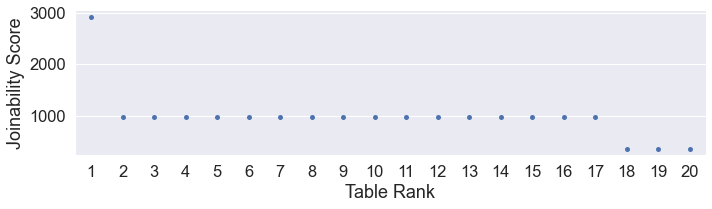

In [6]:
demo.plot_joinability_scores()

___

## Inspecting the joinable table with rank #1

___

In [7]:
demo.display_joinable_table(1)

Joinability score: 2914 
Table ID: 1003141 
#rows: 3000 
#columns: 28 


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,movie_title,num_voted_users
0,color,james cameron,723,178,0,avatar,886204
1,color,gore verbinski,302,169,563,pirates caribbean world s end,471220
2,color,sam mendes,602,148,0,spectre,275868
3,color,christopher nolan,813,164,22000,dark knight rises,1144337
4,color,andrew stanton,462,132,475,john carter,212204


In [8]:
#demo.keep_joinable_tables(5)

___

# 3) Duplicate Detection using XASH

___

## Discovering duplicate tables and their relationship within the joinable tables
___

In [9]:
demo.duplicate_detection().show("nb.html")

___

## Removing duplicates within the top joinable tables

___

In [10]:
#demo.remove_duplicates()

___

# 4) Correlation Calculation

___

## Obtaining the top-10 correlating features using Order Index and COCOA Algorithm

___

In [11]:
demo.correlation_calculation()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 155.25it/s]

--------------------------------------------
Runtime:
--------------------------------------------
Total runtime: 0.66s
Preparation runtime: 0.53s
Correlation calculation runtime: 0.13s

--------------------------------------------
Statistics:
--------------------------------------------
Evaluated features: 92
Max. correlation coefficient: 0.3518


___

## Inspecting the correlation coefficients for the retrieved features

___

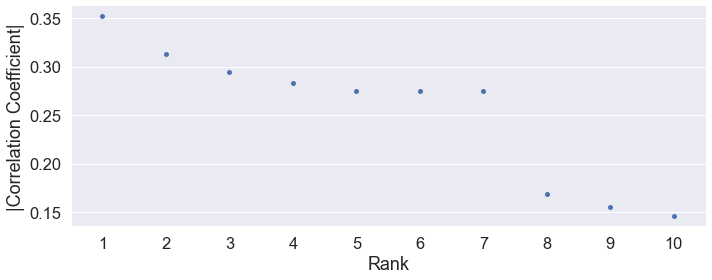

In [12]:
demo.plot_correlation_coefficients()

## Materializing join for the top 4 correlating features

In [13]:
demo.add_external_features([1, 2, 3])

,Movie Title,Director Name,IMDB Score,1003141_num_voted_users,1003141_duration,1003141_num_user_for_reviews
0,Unleashed,Louis Leterrier,70,85198,103,303
1,Vaalu,Vijay Chandar,51,nan,nan,nan
2,The Da Vinci Code,Ron Howard,66,314253,174,1966
3,Midnight in Paris,Woody Allen,77,301149,94,509
4,Why Did I Get Married Too?,Tyler Perry,44,7664,121,68


## Inspect differences between Spearman and Pearson correlation coefficients

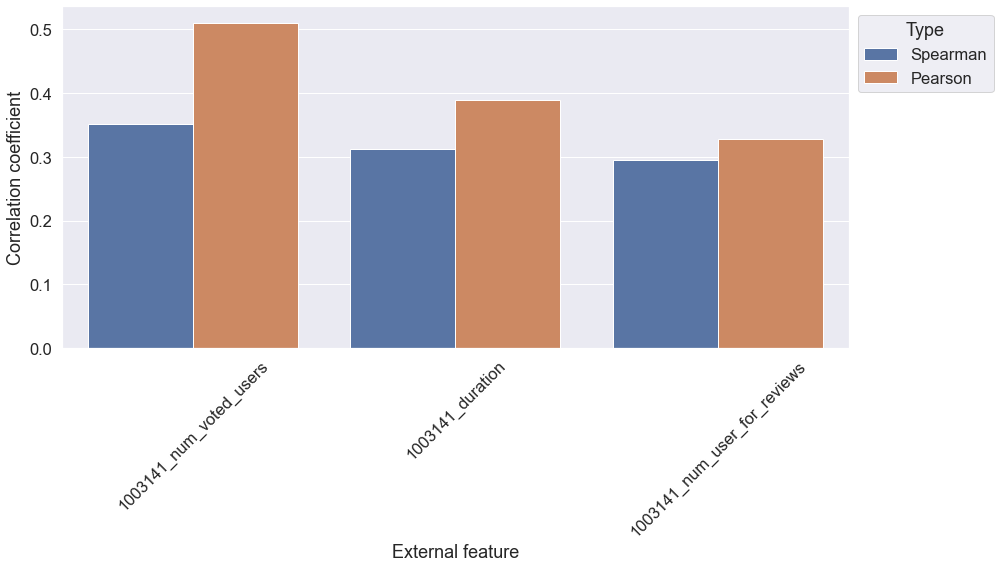

In [14]:
demo.plot_spearman_pearson()

## Inspect correlation between input and top-correlating features

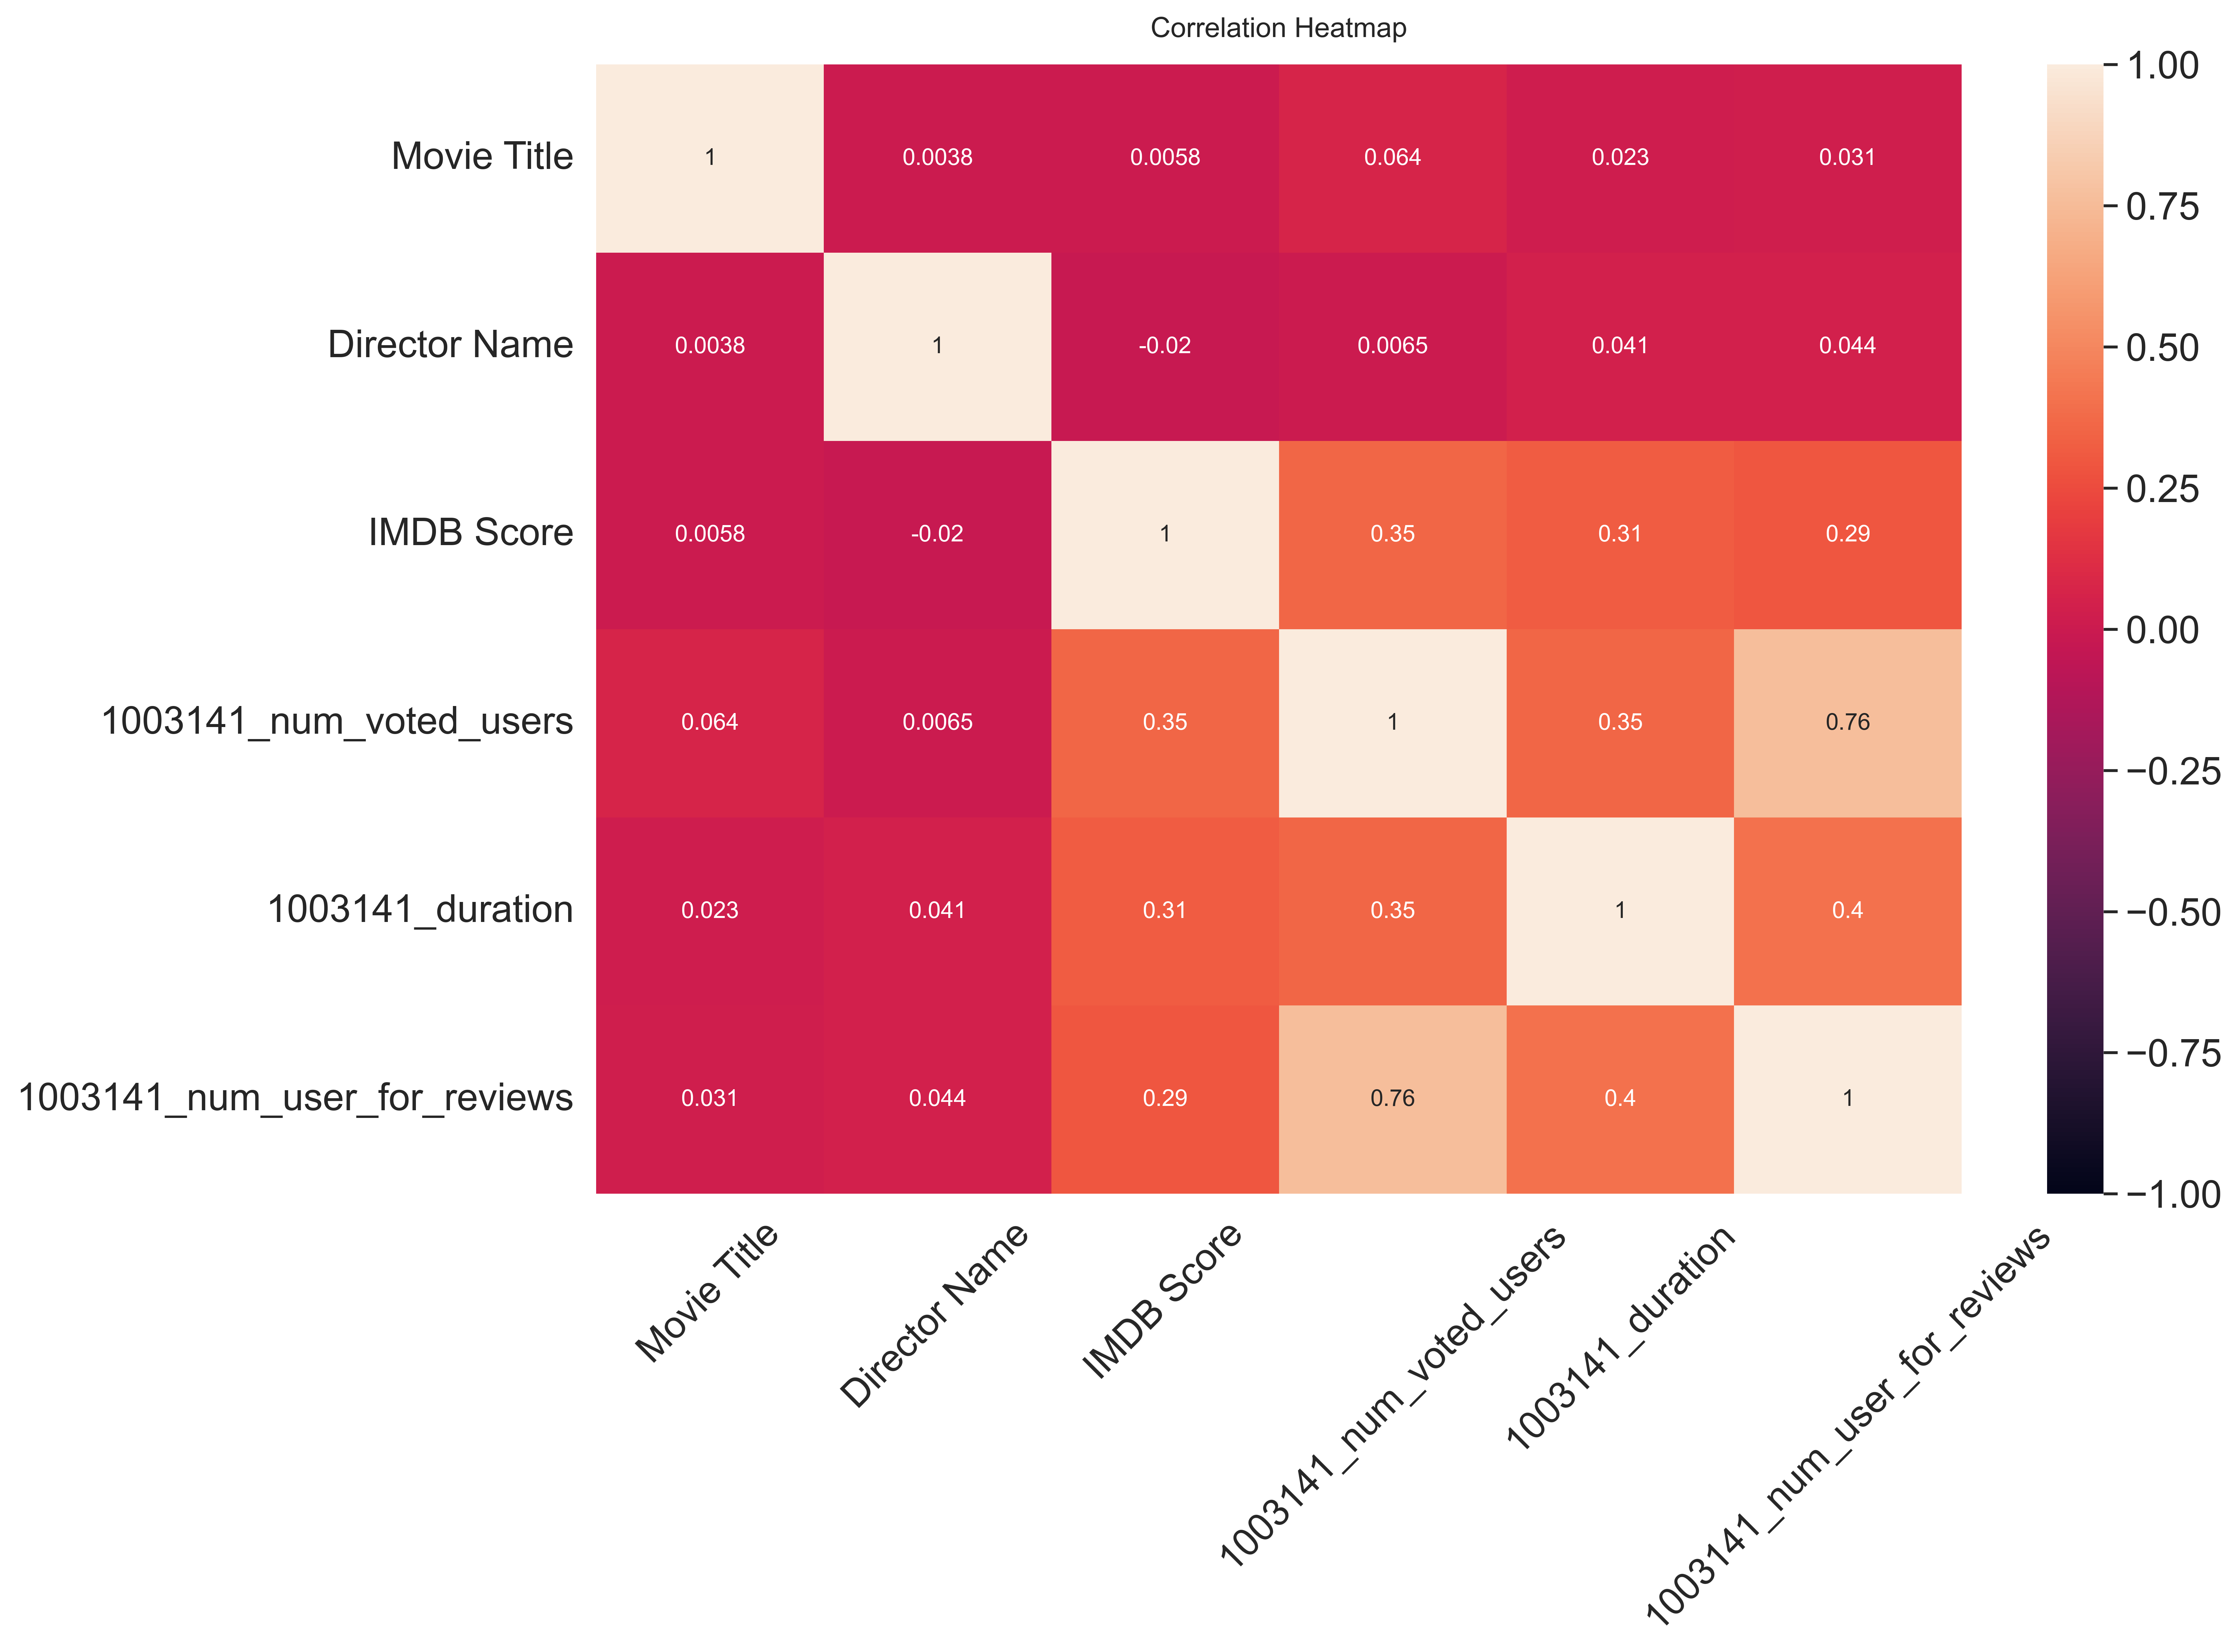

In [15]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 500

demo.plot_correlation_heatmap()

## Compare MSE of the model for the input and enriched datasets

In [16]:
demo.fit_and_evaluate_model()

could not convert string to float: 'Unleashed\xa0'
could not convert string to float: 'Louis Leterrier'
Input
(3350, 0)
(1650, 0)
[]


ValueError: at least one array or dtype is required